In [3]:
import torch
import torch.nn as nn 
import input_layer

InputLayer = input_layer.VitInputLayer()


In [4]:
batch_size, channel, height, width = 2, 3, 32, 32
x = torch.randn( batch_size, channel, height, width)
z_0 = InputLayer( x )

# バッチサイズ：2 トークン数：5 埋め込みベクトルの長さ：384
z_0.size()

torch.Size([2, 5, 384])

# ImageChange Mode

何もしない：UNCHANGED = 0 \
グレースケール：GRAY = 1 \
GRAY_ALPHA = 2 \
RGB = 3 \
RGB_ALPHA = 4 \

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)


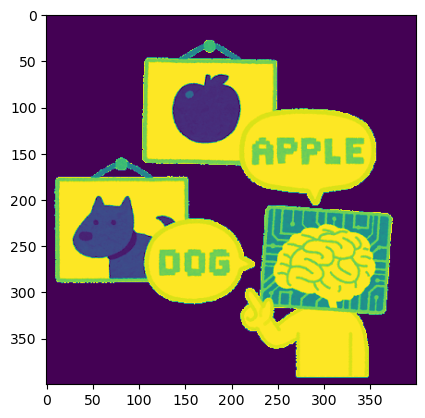

In [56]:
import cv2
import matplotlib.pyplot as plt
import torchvision
from torchvision.io import read_image
# インライン表示
%matplotlib inline

img = cv2.imread('./ai_image_gazou_ninshiki.png')
# Unchangedだと4チャネルになることもある
torch_img = read_image('./ai_image_gazou_ninshiki.png',mode=torchvision.io.image.ImageReadMode.RGB)
print(torch_img.shape)
#画像の表示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # OpenCV は色がGBR順なのでRGB順に並べ替える
plt.imshow(torch_img.permute(1,2,0)); # 画像の表示
plt.show()

In [24]:

# Tensorに変換
img_tensor = torch.from_numpy(img)
img_tensor = torch.permute(img_tensor, (1, 2, 0))
print(img_tensor.size())
output = InputLayer(img_tensor)

torch.Size([400, 3, 400])


RuntimeError: Given groups=1, weight of size [384, 3, 16, 16], expected input[1, 400, 3, 400] to have 3 channels, but got 400 channels instead